# Decision Trees

In [183]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [184]:
import matplotlib.style as stl
stl.use('ggplot')

## Building the model 
Consider the following two-dimensional data, which has one of four class labels.

#### Creating features and Labels

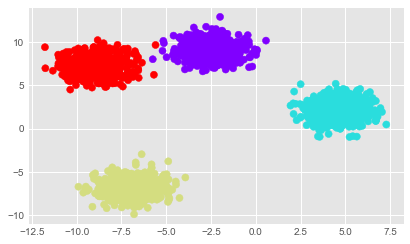

In [185]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=2000, centers=4, random_state=42, cluster_std=1.0, n_features=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

#### Splitting the dataset

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59)

#### Importing the Model
This process of fitting a decision tree to our data can be done in Scikit-Learn with the `DecisionTreeClassifier` estimator

In [187]:
from sklearn.tree import DecisionTreeClassifier

#### Create and Fit a Decision Tree classifier

In [188]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions

#### A quick utility function to help us visualize the output of the classifier:

In [190]:
def visualize_classifier(model, X, y, ax=None, cmap='magma'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5, 
                           cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

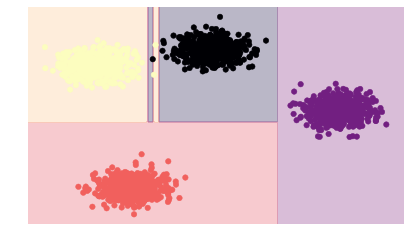

In [191]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## Evaluation

In [192]:
from sklearn.metrics import classification_report, confusion_matrix

In [193]:
print(confusion_matrix(y_test,pred))

[[149   0   0   0]
 [  0 145   0   0]
 [  0   0 166   0]
 [  0   0   0 140]]


In [194]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       149
          1       1.00      1.00      1.00       145
          2       1.00      1.00      1.00       166
          3       1.00      1.00      1.00       140

avg / total       1.00      1.00      1.00       600



# Ensembles of Estimators: Random Forests
This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [196]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

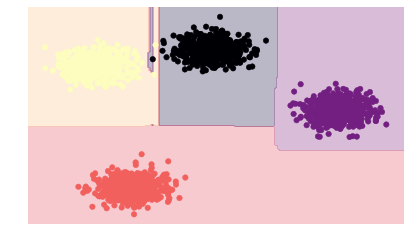

In [197]:
visualize_classifier(bag, X, y)

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the **`RandomForestClassifier`** estimator, which takes care of all the randomization automatically. All you need to do is select a number of *estimators*, and it will very quickly (in parallel, if desired) fit the ensemble of trees.

In [198]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=5)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

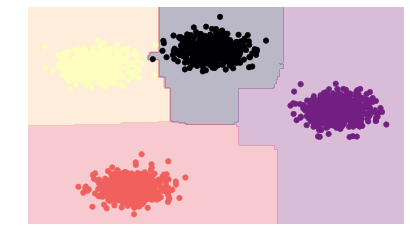

In [199]:
visualize_classifier(model, X, y)

# Random Forest Regression
In the previous section we considered random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the
**`RandomForestRegressor`**, and the syntax is very similar to what we saw earlier. 
#### Consider the following data, drawn from the combination of a fast and slow oscillation.

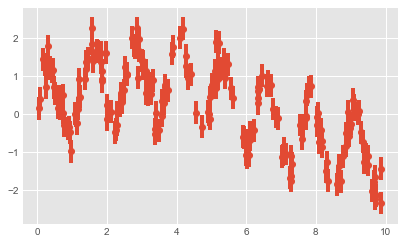

In [200]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Using the random forest regressor, we can find the best-fit curve as follows

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

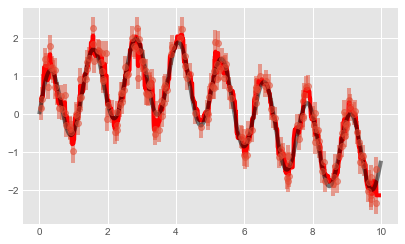

In [203]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

# Example: Random Forest for Classifying Digits

In [204]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['images', 'target_names', 'DESCR', 'target', 'data'])

To remind us what we’re looking at, we’ll visualize the first few data points

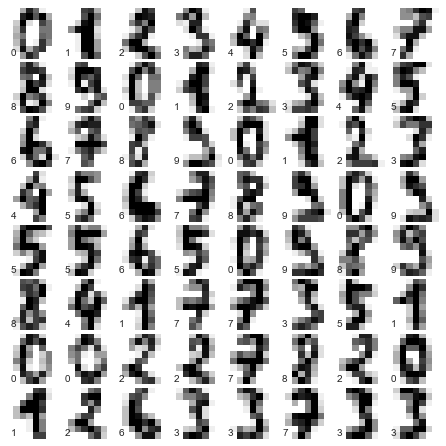

In [205]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can quickly classify the digits using a random forest as follows

In [206]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)

In [207]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [208]:
ypred = model.predict(Xtest)

We can take a look at the classification report for this classifier:

In [209]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



And for good measure, plot the confusion matrix

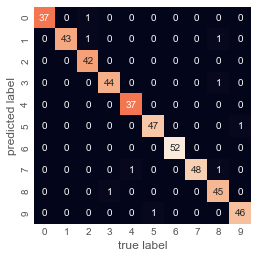

In [210]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');